# Carga de datos Excell

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar todas las hojas del archivo Excel pero no las une todavia.
df_completo = pd.read_excel(r'C:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\datos\customer-details.xlsx', sheet_name=None,index_col=0)  # carga todas las hojas

In [3]:
# Unir todas las hojas en un solo DataFrame
df_unido = pd.concat(df_completo.values(), ignore_index=True)

In [4]:
df_unido.shape
#aqui podemos verificar que el df tiene muchas filas que una sola de las hojas del Excel.

(43170, 6)

In [5]:
df_unido.head(4)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e


# Union de los datos de las hojas del Excel.

Vamos a ver si podemos unir los dos archivos de datos en un mismo DATAFRAME y así trabajar un único conjunto de datos.

In [6]:
#Para ello vamos a volver a cargar los datos del csv y ver si podemos unirlos por una columna en común.
df_bank_additional_o = pd.read_csv(r'C:\Users\usuario\Documents\Profesional\Mercanza\Data Analitics\M6_Python_for_data\Proyecto_Python_for_Data\datos\bank_additional.csv',index_col=0)

In [7]:
df = df_bank_additional_o.copy()

In [8]:
#verificamos que es el archivo a comparar.
df.head(4)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e


In [9]:
todos_existen = df_unido['ID'].isin(df['id_']).all()
print("¿Todos los IDs de df1 están en df2?:", todos_existen)
#con esto comprobamos que los ids de ambos archivos de datos son diferentes por lo que no podriamos juntarlos.

¿Todos los IDs de df1 están en df2?: False


In [10]:
df_concatenado = pd.concat([df, df_unido], axis=0)
df_concatenado.sample(2)
#volvemos a realizar una comprobación y vemos que ahora tendriamos dos columnas ids por lo que se entiende que no se puede
#hacer la union de ambas.

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,date,latitude,longitude,id_,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
18935,NaN,admin.,MARRIED,high.school,0.0,0.0,0.0,cellular,144.0,3.0,...,12-marzo-2015,28.768,-113.754,b0f8a135-7733-440d-adbc-8c4562ad0849,NaN,NaN,NaN,NaT,NaN,NaN
15495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,123321.0,0.0,2.0,2012-08-12,30.0,9e939b39-bfa1-4ed7-86c4-ae19acba5435


In [11]:
#de hecho podemos comprobar que al hacer la concatenación generamos miles de nulos.
df_concatenado.isnull().sum()

age                  48290
job                  43515
marital              43255
education            44977
default              52151
housing              44196
loan                 44196
contact              43170
duration             43170
campaign             43170
pdays                43170
previous             43170
poutcome             43170
emp.var.rate         43170
cons.price.idx       43641
cons.conf.idx        43170
euribor3m            52426
nr.employed          43170
y                    43170
date                 43418
latitude             43170
longitude            43170
id_                  43170
Income               43000
Kidhome              43000
Teenhome             43000
Dt_Customer          43000
NumWebVisitsMonth    43000
ID                   43000
dtype: int64

# EDA preliminar antes de limpieza y transformación de datos

- **Income**: Representa el ingreso anual del cliente en términos monetarios.
- **Kidhome**: Indica el número de niños en el hogar del cliente.
- **Teenhome**: Indica el número de adolescentes en el hogar del cliente.
- **Dt_Customer**: Representa la fecha en que el cliente se convirtió en cliente de la empresa.
- **NumWebVisitsMonth**: Indica la cantidad de visitas mensuales del cliente al sitio web de la empresa.
- **ID**: Identificador único del cliente.


In [12]:
df_unido

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
...,...,...,...,...,...,...
43165,156980,1,2,2014-05-17,7,5f432048-d515-4bb5-9c94-62db451f88d4
43166,139820,0,0,2014-09-29,1,993bbbd6-4dbc-4a40-a408-f91f8462bee6
43167,78470,2,2,2014-10-28,12,d6271666-319d-42c8-a741-cb22bf2c2093
43168,144218,0,1,2014-07-01,9,f67fbfa8-6573-414d-a805-b26a2f1b1ceb


In [13]:
df_unido.describe().T

,count,mean,min,25%,50%,75%,max,std
Income,43170.0,93227.389622,5841.0,49608.0,93009.5,136740.5,180802.0,50498.181989
Kidhome,43170.0,1.004749,0.0,0.0,1.0,2.0,2.0,0.815996
Teenhome,43170.0,0.998633,0.0,0.0,1.0,2.0,2.0,0.816008
Dt_Customer,43170,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,16.59129,1.0,9.0,17.0,25.0,32.0,9.241769


In [14]:
df_unido.dtypes
#los tipos son correctos. No hay nada que cambiar

Income                        int64
Kidhome                       int64
Teenhome                      int64
Dt_Customer          datetime64[ns]
NumWebVisitsMonth             int64
ID                           object
dtype: object

In [15]:
df_unido.isnull().sum()
#no tiene nulos.

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [16]:
df_unido.duplicated().sum()
#no tiene duplicados.

np.int64(0)

Tras el EDA PRELIMINAR podemos verificar que no existe trabajo de "Transformación o limpieza que realizar en estos datos"
Podemos considerar que el conjunto de datos esta OK.

# Transformación y limpieza de datos tras el EDA Preliminar

In [17]:
df_unido['Dt_Customer'] = pd.to_datetime(df_unido['Dt_Customer'])

# Agregar columna con la antigüedad del cliente
df_unido['Customer_Since_Days'] = (pd.Timestamp.today() - df_unido['Dt_Customer']).dt.days

df_unido.head(4)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Customer_Since_Days
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,4876
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,4606
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,4938
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,4615


En este caso no se han apreciado transformaciones ni limpiezas necesarias a realizar.

# Gestion de Nulos

No existen nulos en este conjunto de datos.

# Estadistica Descriptiva

Vamos a realizar los siguientes análisis en función de:
- En relación a la Familia
- En relación al cliente

Para responder a las siguientes preguntas:
- ¿ Que tipo de ingresos perciben nuestros clientes ?
- ¿ Que tipo de familias tienen ?
- ¿ Que relación existe entre numero de visitas y el ser cliente nuestro o no ?
- ¿ Cual es la evolución de nuestra clientela ?

1. Objetivo del Análisis
Analizar el comportamiento y perfil demográfico de los clientes con base en variables como ingresos, composición familiar, visitas web y antigüedad como cliente. Esto permitirá entender mejor la segmentación de clientes y apoyar decisiones de negocio.

    - Total_Kids: Suma de niños + adolescentes

    -  Customer_Since_Days: Antigüedad del cliente (en días desde su registro)

    - Income_Range: Clasificación del ingreso por niveles

    - Income_per_Kid: Indicador de carga económica relativa

In [18]:
df_unido.describe().T

,count,mean,min,25%,50%,75%,max,std
Income,43170.0,93227.389622,5841.0,49608.0,93009.5,136740.5,180802.0,50498.181989
Kidhome,43170.0,1.004749,0.0,0.0,1.0,2.0,2.0,0.815996
Teenhome,43170.0,0.998633,0.0,0.0,1.0,2.0,2.0,0.816008
Dt_Customer,43170,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,16.59129,1.0,9.0,17.0,25.0,32.0,9.241769
Customer_Since_Days,43170.0,4473.076535,3875.0,4153.0,4545.0,4773.0,4970.0,337.760329


Principales insights:

- El ingreso promedio es alto, pero con gran dispersión.

- Algunos clientes tienen muchos años como clientes (más de 4000 días).

- La mayoría de los hogares tienen entre 0 y 2 hijos.

Visualizaciones e Insights

### Ingresos

Vamos a estudiar el poder adquisitivo de nuestros clientes.

In [28]:
df_unido['IncomeGroup'] = pd.qcut(df_unido['Income'], q=5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])


In [29]:
group_means = df_unido.groupby('IncomeGroup')['NumWebVisitsMonth'].mean()
print(group_means)


IncomeGroup
Muy Bajo    16.732337
Bajo        16.548761
Medio       16.368311
Alto        16.509729
Muy Alto    16.797313
Name: NumWebVisitsMonth, dtype: float64


C:\Users\usuario\AppData\Local\Temp\ipykernel_12352\2199712612.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_unido.groupby('IncomeGroup')['NumWebVisitsMonth'].mean()


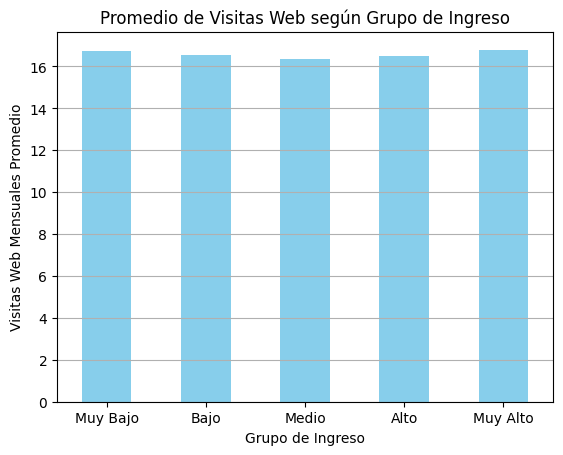

In [30]:
group_means.plot(kind='bar', color='skyblue')
plt.title('Promedio de Visitas Web según Grupo de Ingreso')
plt.xlabel('Grupo de Ingreso')
plt.ylabel('Visitas Web Mensuales Promedio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


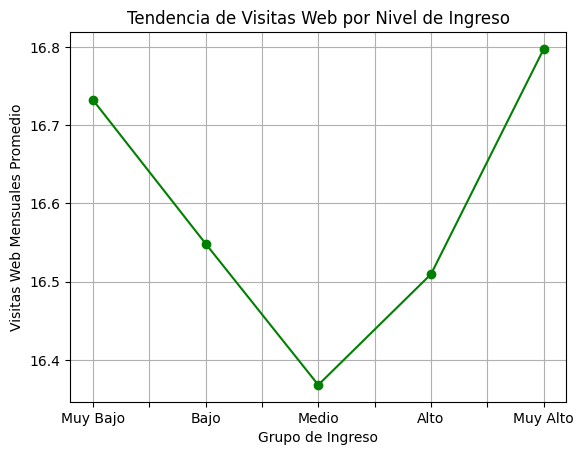

In [31]:
group_means.plot(kind='line', marker='o', color='green')
plt.title('Tendencia de Visitas Web por Nivel de Ingreso')
plt.xlabel('Grupo de Ingreso')
plt.ylabel('Visitas Web Mensuales Promedio')
plt.grid(True)
plt.show()


La distribución de ingresos muestra una leve asimetría hacia la derecha, con un grupo reducido de clientes de muy alto ingreso. Al segmentar en cuartiles, se observa que los clientes del grupo de ingreso alto presentan una mayor actividad web promedio, lo que sugiere un mayor involucramiento con la plataforma. Sin embargo, también se detectan clientes de ingresos bajos con comportamientos digitales intensivos, lo que representa un nicho potencial para campañas personalizadas.

<Axes: xlabel='Income', ylabel='Count'>

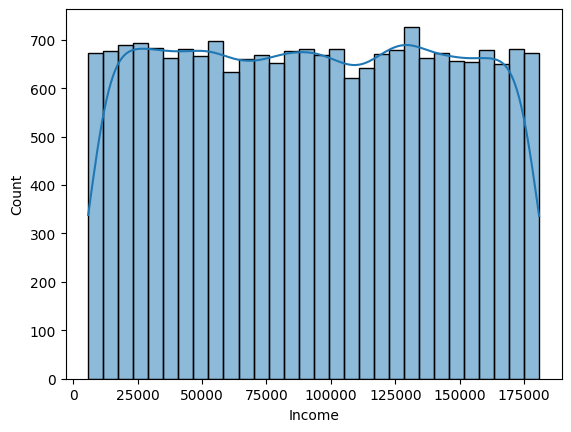

In [ ]:
sns.histplot(df['Income'], bins=30, kde=True)
#La distribución es asimétrica positiva; existen clientes con ingresos extremadamente altos. 
#Se sugiere usar la mediana para evitar sesgos.

<Axes: xlabel='Income_Range'>

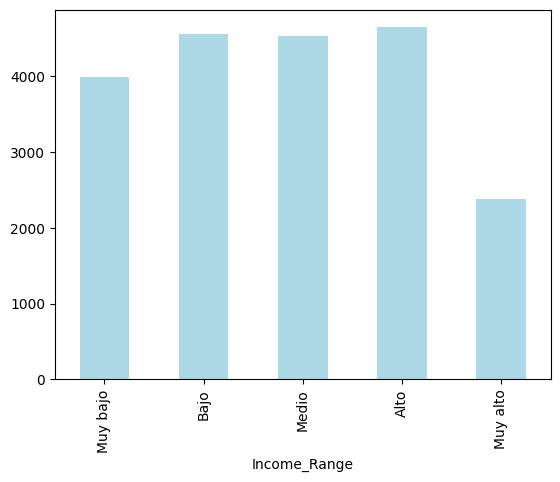

In [ ]:
df_unido['Income_Range'] = pd.cut(df['Income'], bins=[0, 40000, 80000, 120000, 160000, np.inf],
                            labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
df_unido['Income_Range'].value_counts().sort_index().plot(kind='bar',color='lightblue')
#La mayoría de los clientes se concentran en rangos "Medio" a "Alto".

### Visitas web

Ahora vamos a analizar que ocurre ocurre en nuestra web y que impacto tiene en la consecución de nuevos clientes.

In [ ]:
df_unido.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Customer_Since_Days,Year_Month,TotalKids,IncomeGroup,TieneHijos,Income_Range
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,4875,2012-04,1,Muy alto,Con Hijos,Muy alto
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,4605,2012-12,2,Medio,Con Hijos,Medio
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,4937,2012-02,2,Muy alto,Con Hijos,Alto
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,4614,2012-12,3,Alto,Con Hijos,Alto
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4798,2012-06,3,Bajo,Con Hijos,Bajo


C:\Users\usuario\AppData\Local\Temp\ipykernel_1728\1720830130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IncomeGroup', y='NumWebVisitsMonth', data=df_unido, palette='Set3')


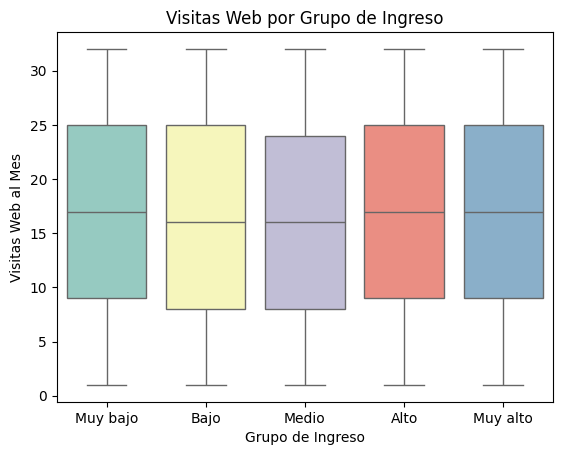

In [ ]:
# Boxplot del número de visitas web por grupo de ingreso
# Objetivo: ver si los ingresos influyen en el comportamiento web

df_unido['IncomeGroup'] = pd.qcut(df_unido['Income'], q=5, labels=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])

sns.boxplot(x='IncomeGroup', y='NumWebVisitsMonth', data=df_unido, palette='Set3')
plt.title('Visitas Web por Grupo de Ingreso')
plt.xlabel('Grupo de Ingreso')
plt.ylabel('Visitas Web al Mes')
plt.show()


<Axes: xlabel='Income', ylabel='NumWebVisitsMonth'>

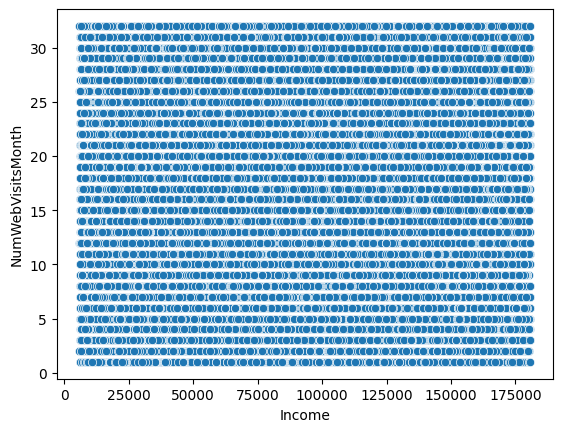

In [ ]:
sns.scatterplot(x='Income', y='NumWebVisitsMonth', data=df_unido)
#No parece haber una relación lineal clara entre nivel de ingreso y visitas web, lo que sugiere que el comportamiento 
#digital no depende del ingreso.

In [ ]:
#Verificación de correlación entre ingresos y visitas web y vemos claramente que no la hay por lo que podemos decir que
#no existe una relación lineal entre el nivel de ingreso y las visitas web.

correlation = df_unido[['Income', 'NumWebVisitsMonth']].corr().iloc[0, 1]
print(f"Correlación: {correlation:.2f}")


Correlación: 0.00


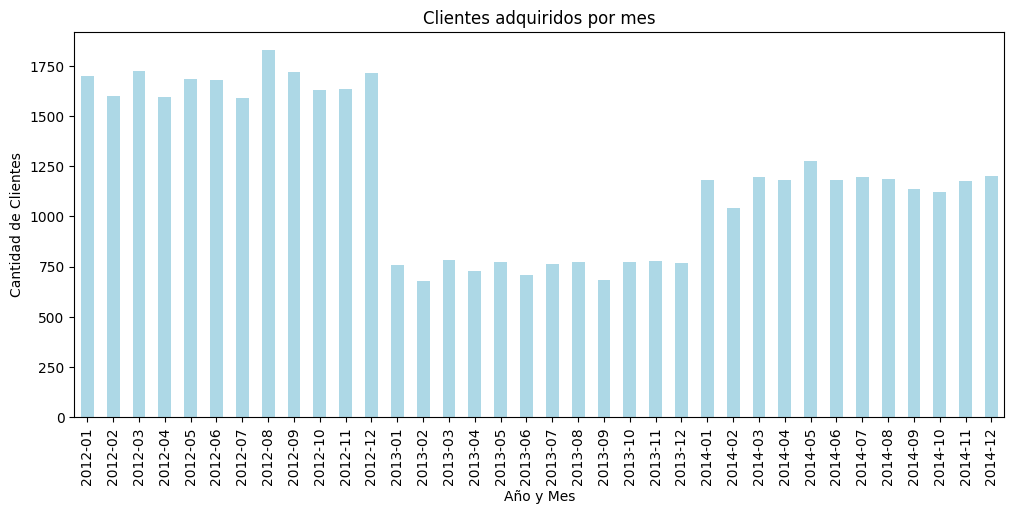

In [ ]:
#Evolución de adquisición de clientes en el tiempo (Dt_Customer)
df_unido['Dt_Customer'] = pd.to_datetime(df_unido['Dt_Customer'])
df_unido['Year_Month'] = df_unido['Dt_Customer'].dt.to_period('M')

df_unido['Year_Month'].value_counts().sort_index().plot(kind='bar', figsize=(12,5), color='lightblue')
plt.title('Clientes adquiridos por mes')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=90)
plt.show()

#En la siguiente visualización podemos observar una clara disminución de nuestra clientela aunque hay un repunte en el 
#ultimo año.

<Axes: xlabel='Customer_Since_Days', ylabel='NumWebVisitsMonth'>

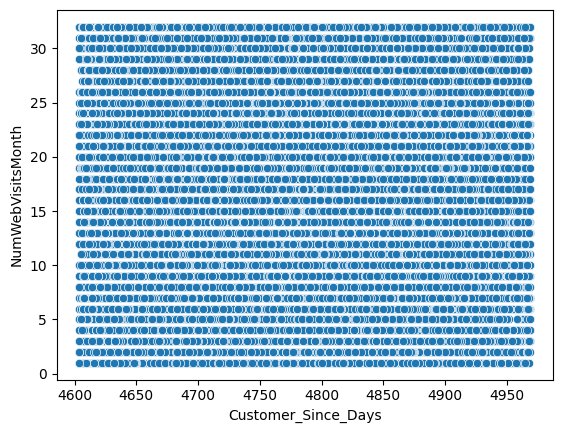

In [ ]:
df['Customer_Since_Days'] = (pd.Timestamp.today() - pd.to_datetime(df['Dt_Customer'])).dt.days
sns.scatterplot(x='Customer_Since_Days', y='NumWebVisitsMonth', data=df)



In [ ]:
#Verificación de correlación entre antigüedad del cliente y visitas web y vemos claramente que no la hay por lo que podemos
#decir que no existe una relación lineal entre la antigüedad del cliente y las visitas web.

correlation = df[['Customer_Since_Days', 'NumWebVisitsMonth']].corr().iloc[0, 1]
print(f"Correlación: {correlation:.2f}")

#Por tanto no se observa un patrón claro; clientes nuevos y antiguos tienen comportamientos digitales similares.

Correlación: -0.00


### Familias

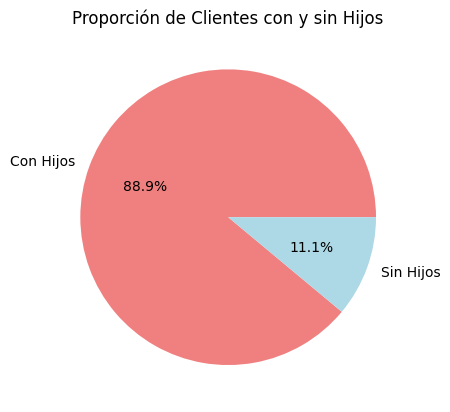

In [ ]:
#Gráfico de pastel: proporción de hogares con hijos
#Objetivo: visualizar la composición familiar general

df_unido['TieneHijos'] = df_unido['TotalKids'].apply(lambda x: 'Con Hijos' if x > 0 else 'Sin Hijos')

df_unido['TieneHijos'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Proporción de Clientes con y sin Hijos')
plt.ylabel('')
plt.show()


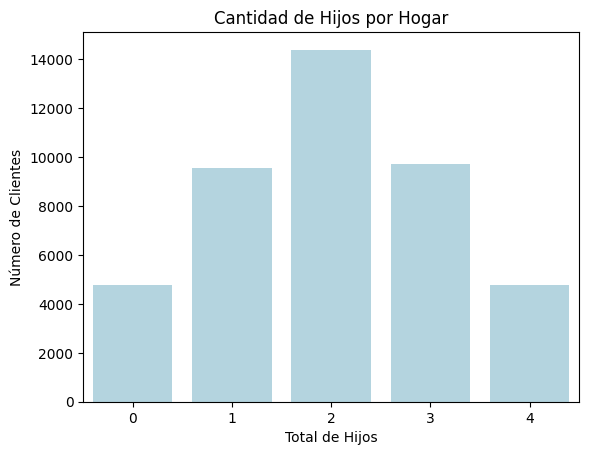

In [ ]:
# Número de hijos por hogar (Kidhome y Teenhome) Suma de hijos
df_unido['TotalKids'] = df_unido['Kidhome'] + df_unido['Teenhome']

sns.countplot(x='TotalKids', data=df_unido, color='lightblue')
plt.title('Cantidad de Hijos por Hogar')
plt.xlabel('Total de Hijos')
plt.ylabel('Número de Clientes')
plt.show()


C:\Users\usuario\AppData\Local\Temp\ipykernel_1728\522952880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total_Kids', y='Income', data=df, palette='Set3')


<Axes: xlabel='Total_Kids', ylabel='Income'>

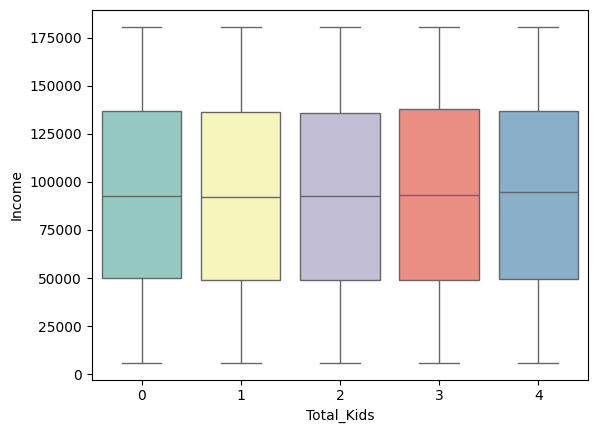

In [ ]:
# verificamos la relación existente entre los ingresos de las familias y el numero de hijos.
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']
sns.boxplot(x='Total_Kids', y='Income', data=df, palette='Set3')

# Observaciones clave:
# Correlaciones débiles entre ingreso y otras variables.
# Ligera relación negativa entre número de hijos e ingreso.


In [ ]:
# Estadísticas básicas: media, mediana, std, min, max por cantidad total de hijos
stats_kids = df.groupby('Total_Kids')['Income'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()
print(stats_kids)


   Total_Kids  count          mean   median           std   min     max
0           0   2251  93234.260329  92692.0  50708.848609  5908  180791
1           1   4406  92943.791648  92203.0  50371.428286  5852  180787
2           2   6687  92872.395992  92791.0  50672.742926  5913  180753
3           3   4560  93193.300000  93431.0  50744.524025  5879  180727
4           4   2211  93654.214383  94556.0  50599.916578  5926  180566


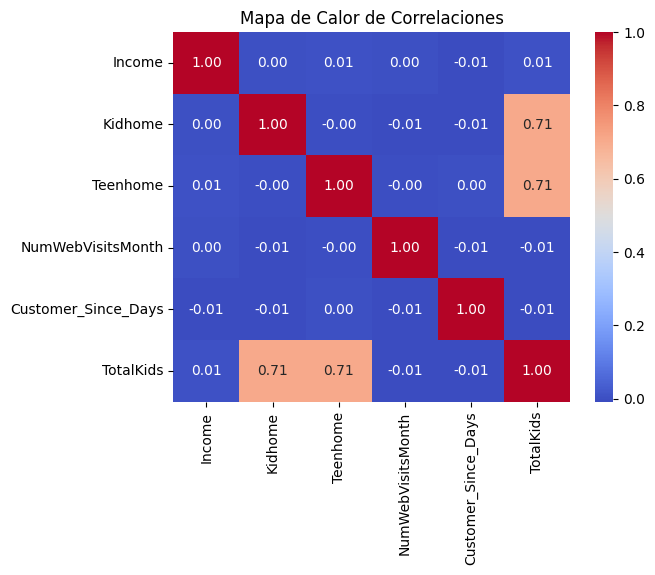

In [ ]:
# Selecciona solo columnas numéricas
numeric_cols = df_unido.select_dtypes(include=np.number)

corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()


C:\Users\usuario\AppData\Local\Temp\ipykernel_1728\1314141933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total_Kids', y='NumWebVisitsMonth', data=df, palette='Set3')


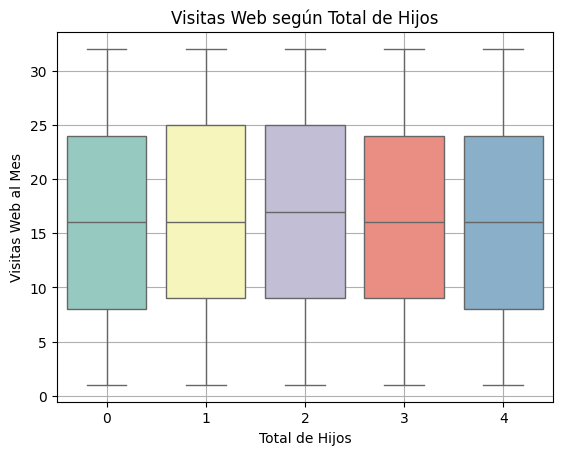

In [ ]:
# Asegurate de haber creado esta columna antes:
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

sns.boxplot(x='Total_Kids', y='NumWebVisitsMonth', data=df, palette='Set3')
plt.title('Visitas Web según Total de Hijos')
plt.xlabel('Total de Hijos')
plt.ylabel('Visitas Web al Mes')
plt.grid(True)
plt.show()


In [ ]:
cor = df[['Total_Kids', 'NumWebVisitsMonth']].corr().iloc[0,1]
print(f"Correlación entre Total_Kids y Visitas Web: {cor:.2f}")


Correlación entre Total_Kids y Visitas Web: 0.00


# Informe explicativo

Pasamos a identificar las conclusiones generales del estudio:

Analizaremos el conjunto de datos basandonos en: 

- **Income Clientes:**
    - La mayoría de los clientes se concentran en rangos "Medio" a "Alto". 
    - Los clientes del grupo de ingreso muy alto presentan una mayor actividad web promedio, lo que sugiere un mayor involucramiento con la plataforma. Sin embargo, también se detectan clientes de ingresos bajos con comportamientos digitales intensivos, lo que representa un nicho potencial para campañas personalizadas
- **Visitas Web:**
    - No existe una relación lineal entre el nivel de ingreso y las visitas web, 
    - No se observa un patrón claro; clientes nuevos y antiguos tienen comportamientos digitales similares.
    - No se encuentra una correlación significativa con ninguna variable.
- **Número de clientes:**
    - El numero de clientes adquiridos a lo largo del tiempo a ido en clara disminución aunque hemos observado un repunte en el último año.   
- **Tipo de familia:**
    - La gran mayoria de nuestros clientes tienen hijos casi un 90%
    - En su gran mayoria tienen dos hijos por familia.